<a href="https://colab.research.google.com/github/payaljain2003/NLP/blob/main/Toxic_comments_kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data source :
https://www.kaggle.com/competitions/jigsaw-toxic-comment-classification-challenge/data

In [1]:
import pandas as pd
import numpy as np

In [6]:
import csv
df = pd.read_csv('train.csv')
#df = pd.read_csv('train.csv', header = None, delimiter="\t", quoting=csv.QUOTE_NONE, encoding='utf-8')

In [7]:
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [8]:
df[df['toxic']==1]

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0
12,0005c987bdfc9d4b,Hey... what is it..\n@ | talk .\nWhat is it......,1,0,0,0,0,0
16,0007e25b2121310b,"Bye! \n\nDon't look, come or think of comming ...",1,0,0,0,0,0
42,001810bf8c45bf5f,You are gay or antisemmitian? \n\nArchangel WH...,1,0,1,0,1,1
43,00190820581d90ce,"FUCK YOUR FILTHY MOTHER IN THE ASS, DRY!",1,0,1,0,1,0
...,...,...,...,...,...,...,...,...
159494,fef4cf7ba0012866,"""\n\n our previous conversation \n\nyou fuckin...",1,0,1,0,1,1
159514,ff39a2895fc3b40e,YOU ARE A MISCHIEVIOUS PUBIC HAIR,1,0,0,0,1,0
159541,ffa33d3122b599d6,Your absurd edits \n\nYour absurd edits on gre...,1,0,1,0,1,0
159546,ffb47123b2d82762,"""\n\nHey listen don't you ever!!!! Delete my e...",1,0,0,0,1,0


In [9]:
from __future__ import print_function, division
from builtins import range

In [10]:
import os
import sys
import matplotlib.pyplot as plt
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
from keras.layers import Dense, Input, Embedding
from keras.layers import Conv1D, MaxPooling1D, GlobalMaxPooling1D
from keras.models import Model
from sklearn.metrics import roc_auc_score

In [11]:
MAX_SEQUENCE_LENGTH = 100
MAX_VOCAB_SIZE = 20000
EMBEDDING_DIM = 100
VALIDATION_SPLIT = 0.2
BATCH_SIZE = 128
EPOCHS = 10

In [3]:
!wget http://nlp.stanford.edu/data/glove.6B.zip

--2023-07-23 10:34:02--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2023-07-23 10:34:03--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2023-07-23 10:34:03--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov

In [4]:
!unzip glove*.zip

Archive:  glove.6B.zip
  inflating: glove.6B.50d.txt        
  inflating: glove.6B.100d.txt       
  inflating: glove.6B.200d.txt       
  inflating: glove.6B.300d.txt       


In [5]:
!ls
!pwd

glove.6B.100d.txt  glove.6B.300d.txt  glove.6B.zip  train.csv
glove.6B.200d.txt  glove.6B.50d.txt   sample_data
/content


In [12]:
print("Loading word vectors......")
word2vec = {}
with open('glove.6B.%sd.txt' % EMBEDDING_DIM) as f:
  for line in f:
    values = line.split()
    word = values[0]
    vec = np.asarray(values[1:], dtype = 'float32')
    word2vec[word] = vec

print('Found %s word vectors' %len(word2vec))

Loading word vectors......
Found 400000 word vectors


In [13]:
print('Loading in comments....')

Loading in comments....


In [14]:
train = df.copy()

In [15]:
train.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [16]:
sentence = train['comment_text'].fillna('DUMMY_VALUE').values  #to convert it to numpy array

In [17]:
train.columns.tolist()[2:]

['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

In [18]:
#similarly to convert the columns to numpy array
possible_labels = train.columns.tolist()[2:]
#possible_labels = ["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]

In [19]:
targets = train[possible_labels].values

In [20]:
print("max sequence length : ", max(len(s) for s in sentence))
print("min sequence length : ", min(len(s) for s in sentence))

max sequence length :  5000
min sequence length :  6


In [21]:
s = sorted(len(s) for s in sentence)
print("median sequence length : " ,s[len(s) // 2])

median sequence length :  205


In [22]:
tokenizer = Tokenizer(num_words = MAX_VOCAB_SIZE)
tokenizer.fit_on_texts(sentence)


In [23]:
sequences = tokenizer.texts_to_sequences(sentence)
print(sequences[0])

[688, 75, 1, 126, 130, 177, 29, 672, 4511, 12053, 1116, 86, 331, 51, 2278, 11449, 50, 6864, 15, 60, 2756, 148, 7, 2937, 34, 117, 1220, 15191, 2825, 4, 45, 59, 244, 1, 365, 31, 1, 38, 27, 143, 74, 3462, 89, 3093, 4583, 2273, 985]


In [24]:
print(sentence[0])

Explanation
Why the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27


In [25]:
word2idx = tokenizer.word_index

In [26]:
len(word2idx)

210314

In [40]:
data = pad_sequences(sequences, maxlen = MAX_SEQUENCE_LENGTH)
print('Shape of data tensor', data.shape)

Shape of data tensor (159571, 100)


In [41]:
#prepare embedding matrix
print('Filling pretrained embeddings....')

num_words = min(MAX_VOCAB_SIZE, len(word2idx)+1)
embedding_matix = np.zeros((num_words, EMBEDDING_DIM))

for word, index in word2idx.items():
  if index < MAX_VOCAB_SIZE:
    embedding_vector = word2vec.get(word)
    if embedding_vector is not None: #word not found in embedding vector will be all zeros
      embedding_matix[index] = embedding_vector

Filling pretrained embeddings....


In [42]:
embedding_layer= Embedding(
    num_words,
    EMBEDDING_DIM,
    weights = [embedding_matix],
    input_length = MAX_SEQUENCE_LENGTH,
    trainable = False
)

In [43]:
print("Building Model....")
#train a 1d Convnet with global maxpooling

input = Input(shape = (MAX_SEQUENCE_LENGTH,))
x = embedding_layer(input)
x = Conv1D(128, 3, activation = 'relu')(x)
x = MaxPooling1D(3)(x)
x = Conv1D(128, 3, activation = 'relu')(x)
x = MaxPooling1D(3)(x)
x = Conv1D(128, 3, activation = 'relu')(x)
x = GlobalMaxPooling1D()(x)
x = Dense(128, activation = 'relu')(x)
output = Dense(len(possible_labels), activation='sigmoid')(x)




Building Model....


In [44]:
model = Model(input, output)
model.compile(loss = 'binary_crossentropy',
              optimizer = 'rmsprop',
              metrics = ['accuracy'])

In [45]:
print('Training model ............')

Training model ............


In [46]:
history = model.fit(
    data,
    targets,
    batch_size = BATCH_SIZE,
    epochs = EPOCHS,
    validation_split = VALIDATION_SPLIT
)

Epoch 1/10
998/998 [==============================] - 173s 171ms/step - loss: 0.0867 - accuracy: 0.9871 - val_loss: 0.0857 - val_accuracy: 0.9941
Epoch 2/10
998/998 [==============================] - 144s 145ms/step - loss: 0.0675 - accuracy: 0.9942 - val_loss: 0.0791 - val_accuracy: 0.9941
Epoch 3/10
998/998 [==============================] - 128s 128ms/step - loss: 0.0629 - accuracy: 0.9937 - val_loss: 0.0688 - val_accuracy: 0.9935
Epoch 4/10
998/998 [==============================] - 128s 128ms/step - loss: 0.0590 - accuracy: 0.9935 - val_loss: 0.0658 - val_accuracy: 0.9940
Epoch 5/10
998/998 [==============================] - 126s 126ms/step - loss: 0.0556 - accuracy: 0.9932 - val_loss: 0.1127 - val_accuracy: 0.9923
Epoch 6/10
998/998 [==============================] - 128s 128ms/step - loss: 0.0526 - accuracy: 0.9933 - val_loss: 0.0746 - val_accuracy: 0.9928
Epoch 7/10
998/998 [==============================] - 128s 128ms/step - loss: 0.0496 - accuracy: 0.9933 - val_loss: 0.0758 -

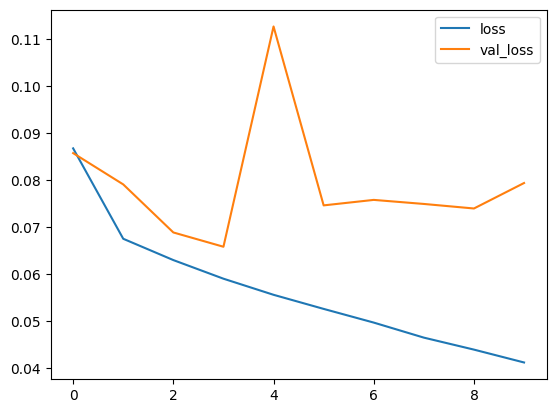

In [47]:
# plot some data
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

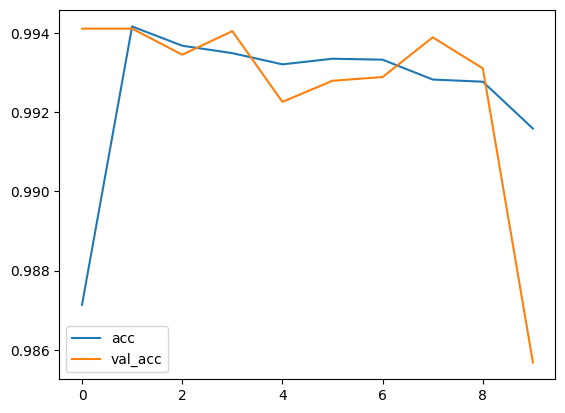

In [49]:
# accuracies
plt.plot(history.history['accuracy'], label='acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()


In [50]:
# plot the mean AUC over each label
p = model.predict(data)
aucs = []
for j in range(6):
    auc = roc_auc_score(targets[:,j], p[:,j])
    aucs.append(auc)
print(np.mean(aucs))


4987/4987 [==============================] - 60s 12ms/step
0.9828264412207751
